In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset

data = pd.read_csv("C:/PythonFund/Cap08/Notebooks/kc_house_data.csv")

In [3]:
# show the number of rows and columns in dataset

print(data.shape)

(21613, 21)


In [4]:
# show the name of columns of dataset

print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
# show the first 5 lines of dataset

print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [6]:
# Some basics statistics

mean_price = round(data['price'].mean(),2)
min_price = round(data['price'].min(),2)
max_price = round(data['price'].max(),2)
std_price = round(data['price'].std(),2)

print(f'Mean: R$ {mean_price}  Min: R$ {min_price}  Max: R$ {max_price}  Std: R$ {std_price}')

Mean: R$ 540088.14  Min: R$ 75000.0  Max: R$ 7700000.0  Std: R$ 367127.2


In [7]:
# Main statistics description

data['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [8]:
# sort the dataset by the price column in descending order

print(data[['id','price']].sort_values('price', ascending=False))

               id      price
7252   6762700020  7700000.0
3914   9808700762  7062500.0
9254   9208900037  6885000.0
4411   2470100110  5570000.0
1448   8907500070  5350000.0
...           ...        ...
8274   3883800011    82000.0
16198  3028200080    81000.0
465    8658300340    80000.0
15293    40000362    78000.0
1149   3421079032    75000.0

[21613 rows x 2 columns]


In [9]:
# Sort the dataset by the bedrooms column in descending order

print(data[['id','bedrooms']].sort_values('bedrooms', ascending=False))

               id  bedrooms
15870  2402100895        33
8757   1773100755        11
15161  5566100170        10
13314   627300145        10
19254  8812401450        10
...           ...       ...
19452  3980300371         0
8484   2310060040         0
875    6306400140         0
8477   2569500210         0
9773   3374500520         0

[21613 rows x 2 columns]


In [10]:
# Average size of all houses

mean_size = round(data['sqft_basement'].mean(),0)
print(mean_size)

292.0


In [27]:
# How many houses have how many bedrooms
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [30]:
# How many houses have 2 bedrooms
two_bed = data.loc[data['bedrooms']==2]
print(two_bed['bedrooms'].count())

2760


In [40]:
two_bed = data.loc[data['bedrooms']==2]
print(round(two_bed['price'].mean(),2))

401372.68


In [39]:
two_bed['price'].describe()

count    2.760000e+03
mean     4.013727e+05
std      1.980518e+05
min      7.800000e+04
25%      2.698375e+05
50%      3.740000e+05
75%      4.900000e+05
max      3.278000e+06
Name: price, dtype: float64

In [ ]:
# Two bedrooms houses average price
mean_size = round(data['sqft_basement'].mean(),0)
print(mean_size)

In [12]:
# Data Correlation

corr = data.corr().round(3)
print(corr)

                  id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000 -0.017     0.001      0.005       -0.012    -0.132   
price         -0.017  1.000     0.308      0.525        0.702     0.090   
bedrooms       0.001  0.308     1.000      0.516        0.577     0.032   
bathrooms      0.005  0.525     0.516      1.000        0.755     0.088   
sqft_living   -0.012  0.702     0.577      0.755        1.000     0.173   
sqft_lot      -0.132  0.090     0.032      0.088        0.173     1.000   
floors         0.019  0.257     0.175      0.501        0.354    -0.005   
waterfront    -0.003  0.266    -0.007      0.064        0.104     0.022   
view           0.012  0.397     0.080      0.188        0.285     0.075   
condition     -0.024  0.036     0.028     -0.125       -0.059    -0.009   
grade          0.008  0.667     0.357      0.665        0.763     0.114   
sqft_above    -0.011  0.606     0.478      0.685        0.877     0.184   
sqft_basement -0.005  0.3

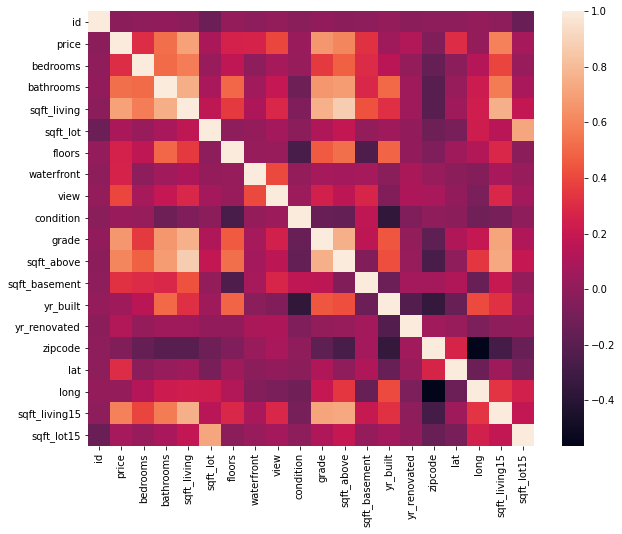

In [13]:
# Correlation Heatmap

plt.figure(figsize=(10,8))
ax = sns.heatmap(corr)